In [1]:
""" Check if lat/lon change significantly in the files, causing the non-true-orphans problem """
import subprocess
import pandas as pd
import os
import glob

import pandas as pd
import matplotlib.pylab as plt
import os,sys

import xarray as xr
import numpy as np
import cartopy.crs as ccrs
    
import h5py as h5

from multiprocessing import Pool
from functools import partial

In [2]:



def get_dic(f):
        """ Extract data from each file """
        F = h5.File(f)
    
        lat = F["observations_table"]["latitude"][:]
        lon = F["observations_table"]["longitude"][:]
        lats, lats_indices = np.unique(lat , return_index=True)
        lons = lon[lats_indices]
            
        df_lat_lon = pd.DataFrame.from_dict( {"lat":lats, "lon":lons } )
        df_lat_lon = df_lat_lon.drop_duplicates()

        df_lat_lon = df_lat_lon.sort_values( by=["lat","lon"] )
        
        return df_lat_lon
    
    

In [3]:
def plot(dataset, lats, lons):

    fs = 13
    size = 10
    
    fig = plt.figure(figsize = (12,8))
    ax = plt.axes(projection=ccrs.PlateCarree() )
    ax.coastlines()
        
    plt.xlim([-180.,180.])
    plt.ylim([-90.,90.])

    
    first_lat = [ p[0] for p in lats]
    second_lat = [ p[1] for p in lats]
    
    first_lon = [ p[0] for p in lons]
    second_lon = [ p[1] for p in lons]


    print(len(first_lat) , len(second_lon))
    plt.scatter( first_lon, first_lat, s= size, transform=ccrs.PlateCarree(), color = "magenta")    
    plt.scatter( second_lon, second_lat, s= size, transform=ccrs.PlateCarree(), color = "magenta")
    for i in range(len(first_lat)):
        x = [first_lon[i], second_lon[i]]
        y = [first_lat[i], second_lat[i]]
        plt.plot(x,y, color = "blue" , lw = 2)
    
        
    if dataset == 'rda':
        ds = 'NCAR'
    elif dataset == 'ai_bfr':
        ds = 'BUFR'
    else:
        ds = 'ERA5 ' + dataset 
        
    plt.title (str(len(first_lon)) + ' stations of the dataset ' + ds , fontsize = fs)

    plt.legend(fontsize = 12, loc = 'lower left')
    
    plt.savefig('Plots/all_stations_map_' + dataset + '.png', dpi= 250,   bbox_inches = 'tight' )
    plt.show()

    plt.close()
    
 

/raid60/scratch/federico/MAY2021_HARVEST_secondary//era5_1759/unidentified_wrongLatLon//0-20999-0-54843_era5_1759_harvested_era5.1759.conv._1:54836.gz.nc/raid60/scratch/federico/MAY2021_HARVEST_secondary//era5_1759/unidentified_wrongLatLon//0-20999-0-6:109283_era5_1759_harvested_era5.1759.conv._6:109283.gz.nc/raid60/scratch/federico/MAY2021_HARVEST_secondary//era5_1759/unidentified_wrongLatLon//0-20999-0-55299_era5_1759_harvested_era5.1759.conv._1:55299.gz.nc/raid60/scratch/federico/MAY2021_HARVEST_secondary//era5_1759/unidentified_wrongLatLon//0-20999-0-6:100959_era5_1759_harvested_era5.1759.conv._6:100959.gz.nc/raid60/scratch/federico/MAY2021_HARVEST_secondary//era5_1759/unidentified_wrongLatLon//0-20999-0-6:100358_era5_1759_harvested_era5.1759.conv._6:100358.gz.nc/raid60/scratch/federico/MAY2021_HARVEST_secondary//era5_1759/unidentified_wrongLatLon//0-20999-0-56374_era5_1759_harvested_era5.1759.conv._1:56374.gz.nc/raid60/scratch/federico/MAY2021_HARVEST_secondary//era5_1759/unidenti

No handles with labels found to put in legend.


64 64


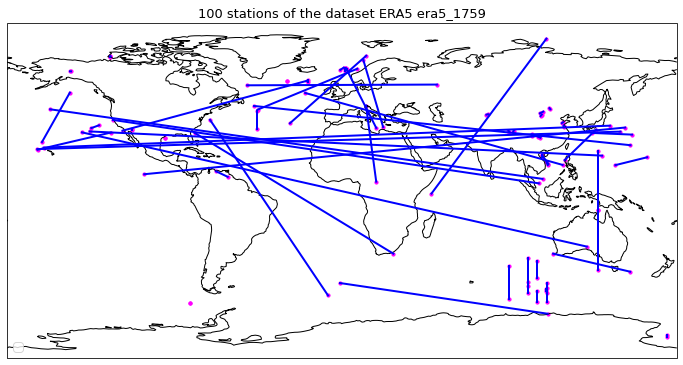

/raid60/scratch/federico/MAY2021_HARVEST_secondary//era5_1761/unidentified_wrongLatLon//0-20999-0-72335_era5_1761_harvested_era5.1761.conv._2:13822.gz.nc/raid60/scratch/federico/MAY2021_HARVEST_secondary//era5_1761/unidentified_wrongLatLon//0-20999-0-72202_era5_1761_harvested_era5.1761.conv._1:72202.gz.nc/raid60/scratch/federico/MAY2021_HARVEST_secondary//era5_1761/unidentified_wrongLatLon//0-20999-0-USW00013942_era5_1761_harvested_era5.1761.conv._2:13944.gz.nc/raid60/scratch/federico/MAY2021_HARVEST_secondary//era5_1761/unidentified_wrongLatLon//0-20999-0-72214_era5_1761_harvested_era5.1761.conv._1:72214.gz.nc/raid60/scratch/federico/MAY2021_HARVEST_secondary//era5_1761/unidentified_wrongLatLon//0-20999-0-72233_era5_1761_harvested_era5.1761.conv._1:72231.gz.nc
/raid60/scratch/federico/MAY2021_HARVEST_secondary//era5_1761/unidentified_wrongLatLon//0-20999-0-72226_era5_1761_harvested_era5.1761.conv._2:13850.gz.nc


/raid60/scratch/federico/MAY2021_HARVEST_secondary//era5_1761/unidentifi

No handles with labels found to put in legend.


83 83


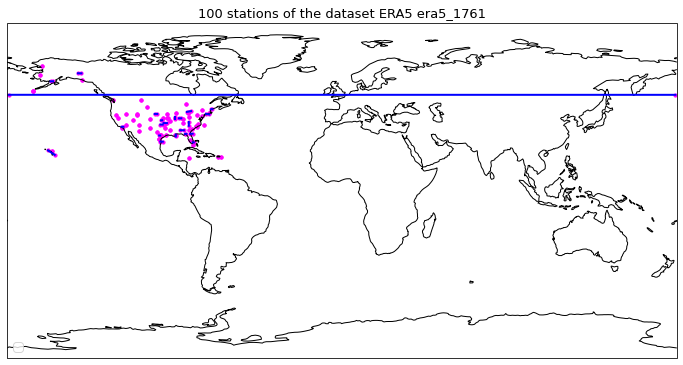

/raid60/scratch/federico/MAY2021_HARVEST_secondary//igra2/unidentified_wrongLatLon//0-20999-igra2_harvested_ZZV0000ZDLG-data.txt.nc/raid60/scratch/federico/MAY2021_HARVEST_secondary//igra2/unidentified_wrongLatLon//0-20999-igra2_harvested_ZZV0000DKIW-data.txt.nc/raid60/scratch/federico/MAY2021_HARVEST_secondary//igra2/unidentified_wrongLatLon//0-20999-igra2_harvested_ZZV000ASFR3-data.txt.nc/raid60/scratch/federico/MAY2021_HARVEST_secondary//igra2/unidentified_wrongLatLon//0-20999-igra2_harvested_ZZV0000ZSAF-data.txt.nc/raid60/scratch/federico/MAY2021_HARVEST_secondary//igra2/unidentified_wrongLatLon//0-20999-igra2_harvested_ZZXUAICE014-data.txt.nc/raid60/scratch/federico/MAY2021_HARVEST_secondary//igra2/unidentified_wrongLatLon//0-20999-igra2_harvested_ZZV00ASES01-data.txt.nc/raid60/scratch/federico/MAY2021_HARVEST_secondary//igra2/unidentified_wrongLatLon//0-20999-igra2_harvested_ZZV00ASDE03-data.txt.nc/raid60/scratch/federico/MAY2021_HARVEST_secondary//igra2/unidentified_wrongLatLon/

In [ ]:
# Extracting the dasta with multiprocessing and creating plots

datasets = ["era5_1","era5_2","era5_1759","era5_1761","igra2","ncar"]

datasets = ["era5_1759","era5_1761","igra2","ncar"]

harvested_dir = "/raid60/scratch/federico/MAY2021_HARVEST_secondary/"

for d in datasets:
    if not os.path.isdir("lat_lon_mismatch_" + d + ".npy" ):
        
        dir_full = harvested_dir +'/'+ d + '/unidentified_wrongLatLon/'
        flist=os.listdir(dir_full)
        #print(flist)
        flist = [dir_full + "/" + f for f in flist if '20999' in f ]

        func = partial(get_dic)
        p = Pool(10)
        res=list(p.map(func, flist))


        Lats, Lons = [],[]

        for r in res:
            Lats.append([ list(r["lat"])[0], list(r["lat"])[-1] ])
            Lons.append([ list(r["lon"])[0] , list(r["lon"])[-1] ])

        dic = { "lat": Lats , "lon": Lons}
        np.save( "lat_lon_mismatch_" + d , dic, allow_pickle=True )
        
    else:
        dic = np.load("lat_lon_mismatch_" + d + ".npy", allow_pickle = True).item()
        Lats = dic["lat"]
        Lons = dic["lons"]
        
    dummy = plot(d,Lats,Lons)
    
    

